<center>
  <div style="background-color: red; color: white; border: 2px solid white; padding: 10px; border-radius: 10px; display: inline-block;">
    <h1 style="margin: 0;">Document Image Parsing with ByteDance - Dolphin</h1>
  </div>
</center>

# **1. Clone the repository:**

In [2]:
! git clone https://github.com/ByteDance/Dolphin.git

Cloning into 'Dolphin'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 39 (delta 1), reused 10 (delta 1), pack-reused 29 (from 1)
Receiving objects: 100% (39/39), 9.71 MiB | 38.08 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
%cd Dolphin

/kaggle/working/Dolphin


In [4]:
! ls

assets	 demo		     demo_page_hf.py  pyproject.toml	utils
chat.py  demo_element_hf.py  demo_page.py     README.md
config	 demo_element.py     LICENSE	      requirements.txt


In [5]:
#! pip install -r requirements.txt

# **2. Download the pre-trained model**

In [6]:
# Download the model from Hugging Face Hub
! git lfs install
! git clone https://huggingface.co/ByteDance/Dolphin ./hf_model

Updated git hooks.
Git LFS initialized.
Cloning into './hf_model'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 16), reused 0 (delta 0), pack-reused 1 (from 1)
Unpacking objects: 100% (34/34), 1.22 MiB | 2.27 MiB/s, done.


# **3. Inference**

In [7]:
import logging
import time
from pathlib import Path
import pandas as pd
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
from PIL import Image
import os

from IPython.display import display, HTML
import base64
import markdown

In [8]:
def display_file(file_path):
    """
    Display a PDF file or an image file.

    Args:
        file_path (str): Path to the PDF or image file.
    """
    # Check file extension to determine the type
    file_extension = os.path.splitext(file_path)[1].lower()
    
    if file_extension == '.pdf':
        # Convert and display PDF pages as images
        images = convert_from_path(file_path)
        for i, image in enumerate(images):
            plt.figure(figsize=(16, 12))
            plt.imshow(image)
            plt.axis('off')  # Hide axis for a cleaner look
            plt.show()
    elif file_extension in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']:
        # Open and display the image file
        image = Image.open(file_path)
        plt.figure(figsize=(16, 12))
        plt.imshow(image)
        plt.axis('off')  # Hide axis for a cleaner look
        plt.show()
    else:
        raise ValueError("Unsupported file type. Please provide a PDF or image file.")

In [11]:
def display_image_results(markdown_path, image_path):
    with open(markdown_path, "r", encoding="utf-8") as f:
        markdown_text = f.read()
    
    html_content = markdown.markdown(markdown_text)
    
    with open(image_path, "rb") as img_file:
        img_data = base64.b64encode(img_file.read()).decode()
    
    html = f"""
    <div style="display: flex; align-items: flex-start; gap: 20px;">
        <img src="data:image/png;base64,{img_data}" style="max-width: 400px; height: auto; border: 1px solid #ccc;" />
        <div style="flex: 1;">{html_content}</div>
    </div>
    """
    
    display(HTML(html))

## **Example n°1**

In [12]:
# Process a single document image
! python demo_page_hf.py --model_path ./hf_model --input_path ./demo/page_imgs/page_1.jpeg --save_dir ./results

2025-06-08 12:32:50.750477: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749385970.952046     168 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749385971.011130     168 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True`


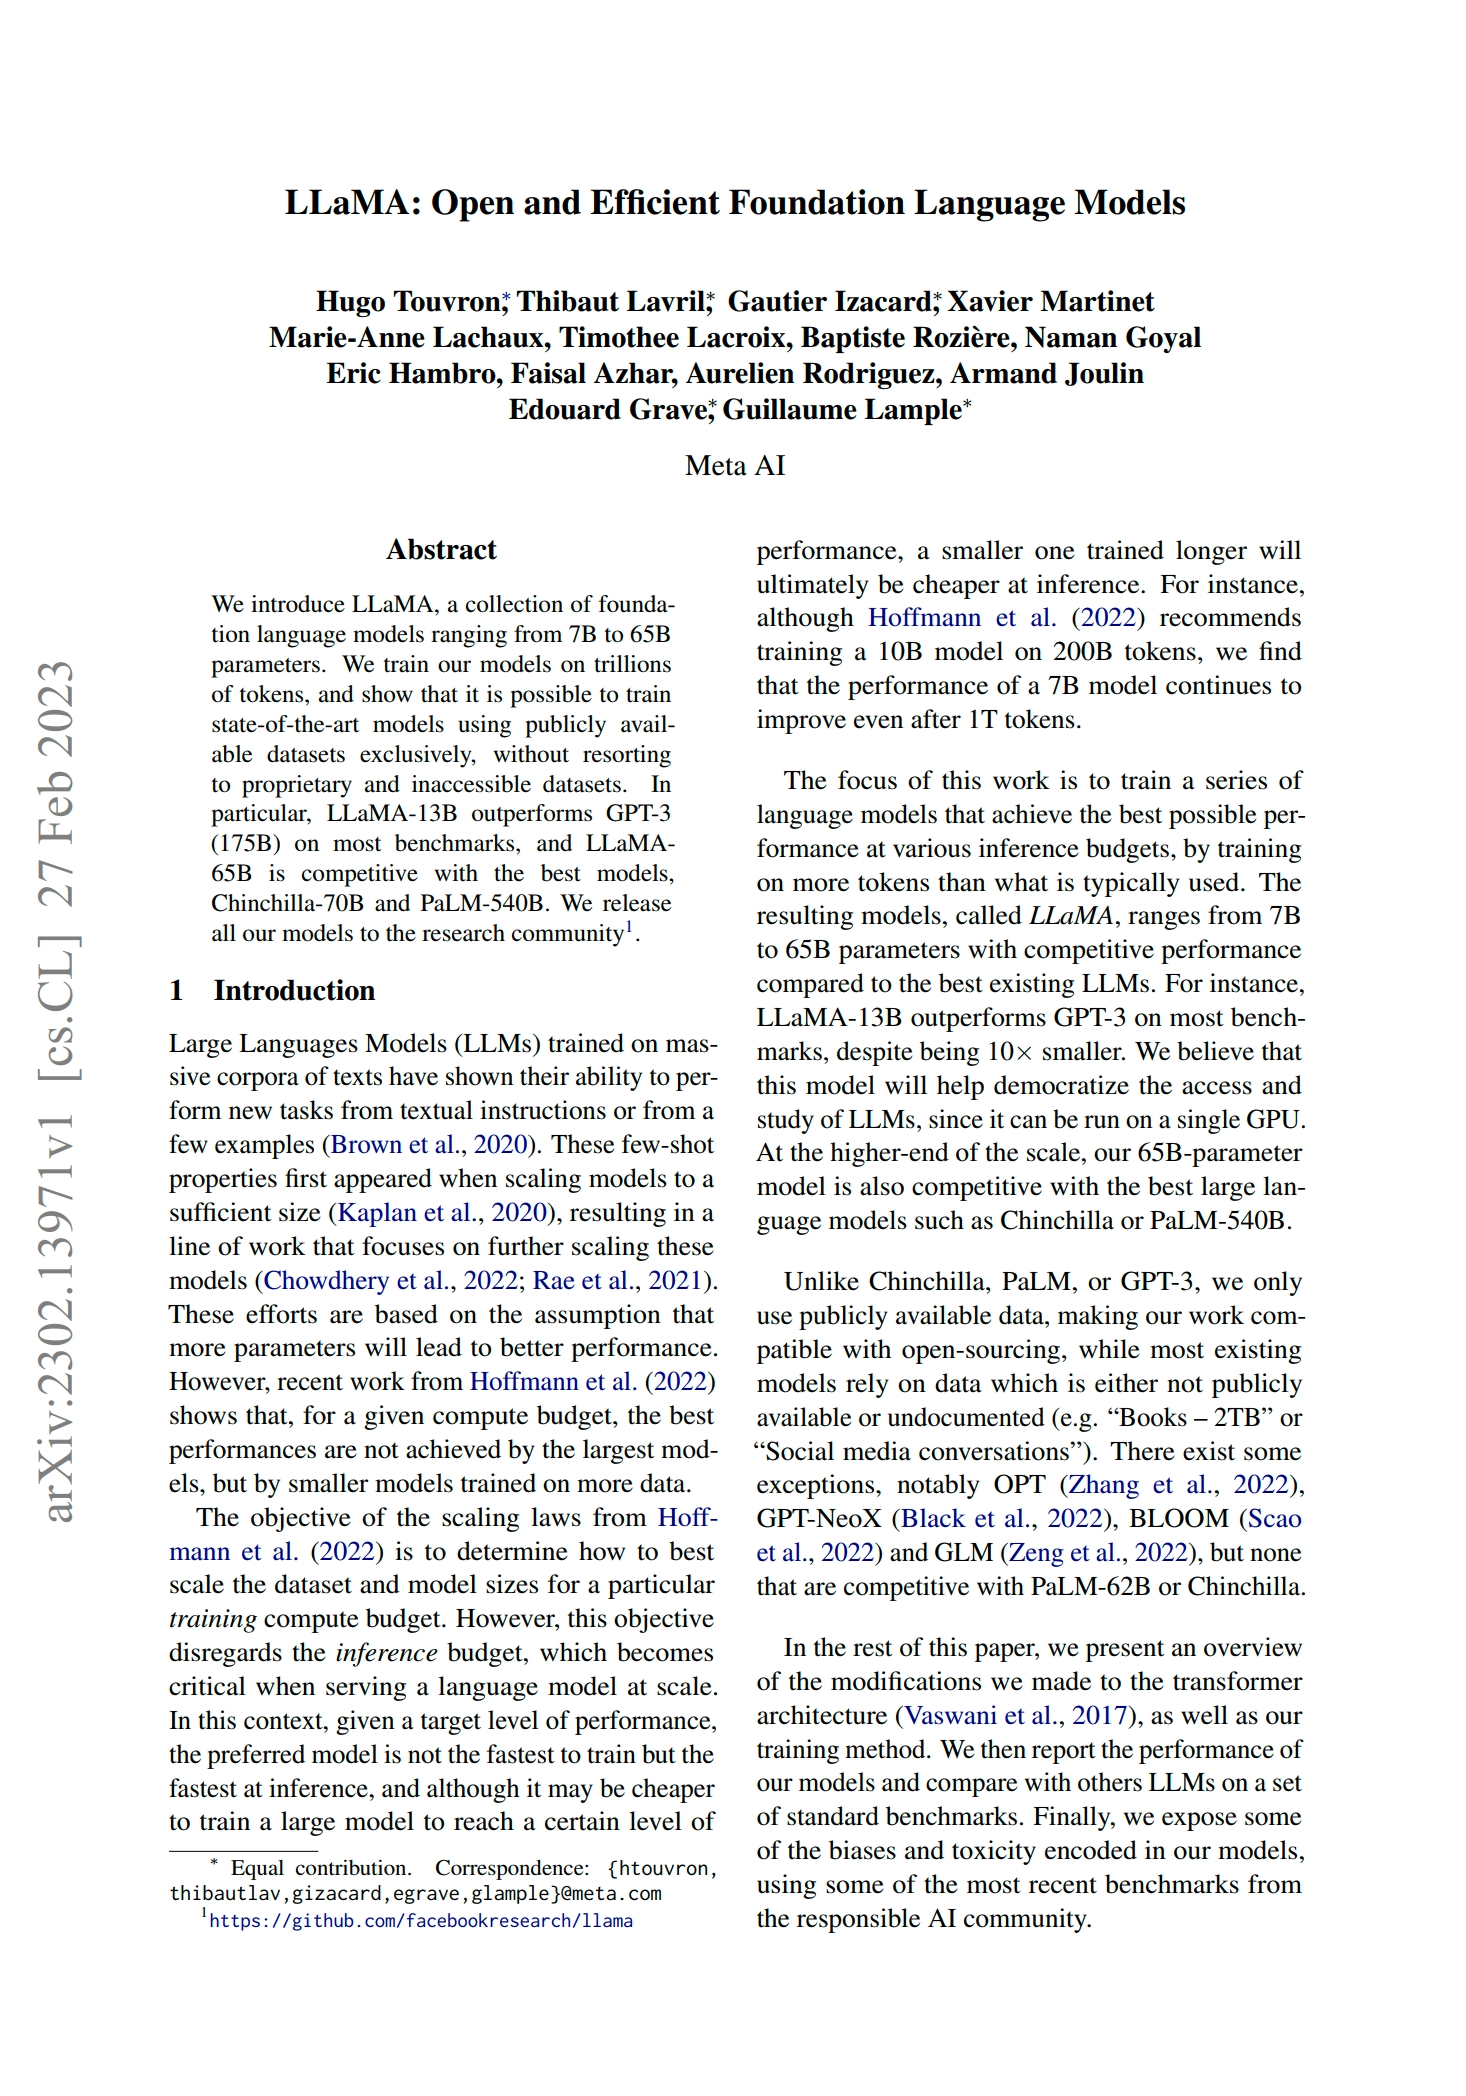

In [13]:
display_image_results("./results/markdown/page_1.md", "./demo/page_imgs/page_1.jpeg")

## **Example n°2**

In [16]:
# Process a single document image
! python demo_page_hf.py --model_path ./hf_model --input_path /kaggle/input/different-tables-images-testing/NVIDIA_Report_Removed_Pages-1-16-5_page-0001.jpg --save_dir ./results

2025-06-08 12:36:07.035644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749386167.056801     224 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749386167.063134     224 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True`


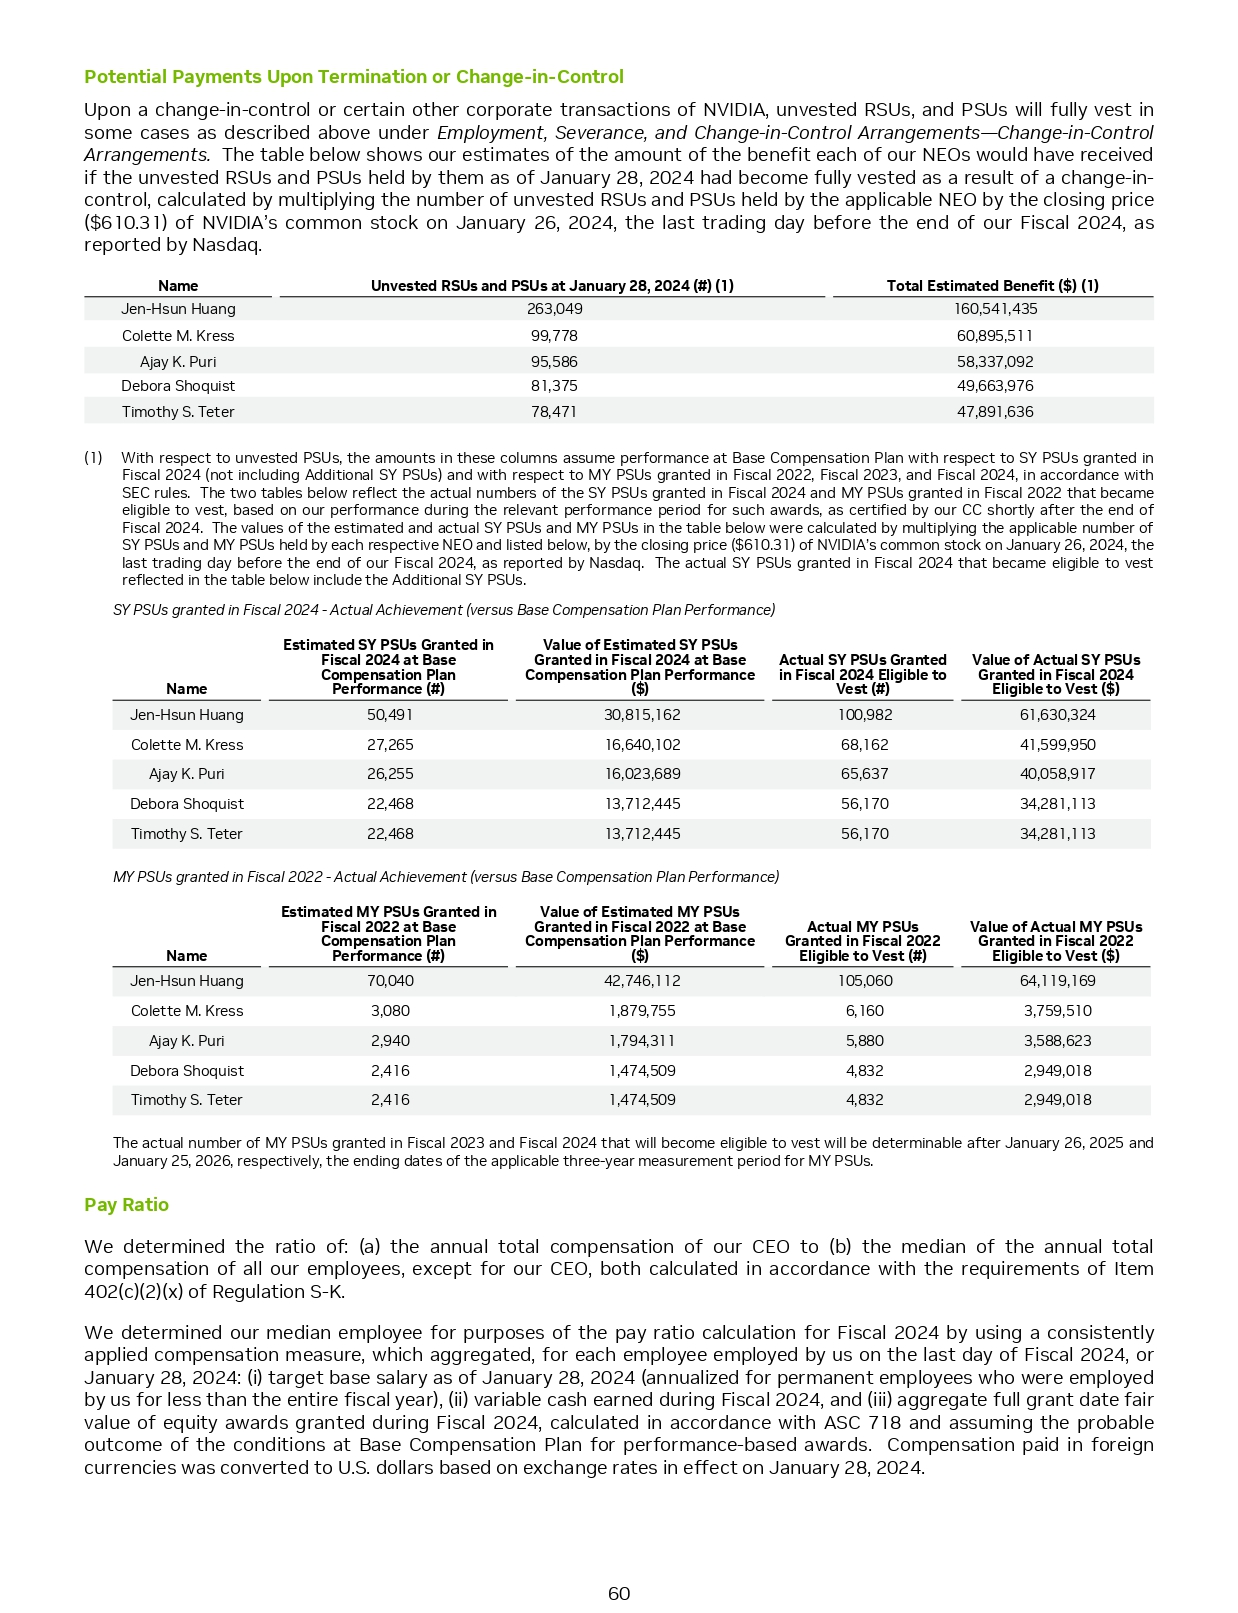

In [17]:
display_image_results("./results/markdown/NVIDIA_Report_Removed_Pages-1-16-5_page-0001.md", "/kaggle/input/different-tables-images-testing/NVIDIA_Report_Removed_Pages-1-16-5_page-0001.jpg")

## **Example n°3**

In [18]:
# Process a single document image
! python demo_page_hf.py --model_path ./hf_model --input_path /kaggle/input/different-tables-images-testing/other_table_big.jpg --save_dir ./results

2025-06-08 12:38:12.099266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749386292.120560     252 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749386292.126991     252 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True`


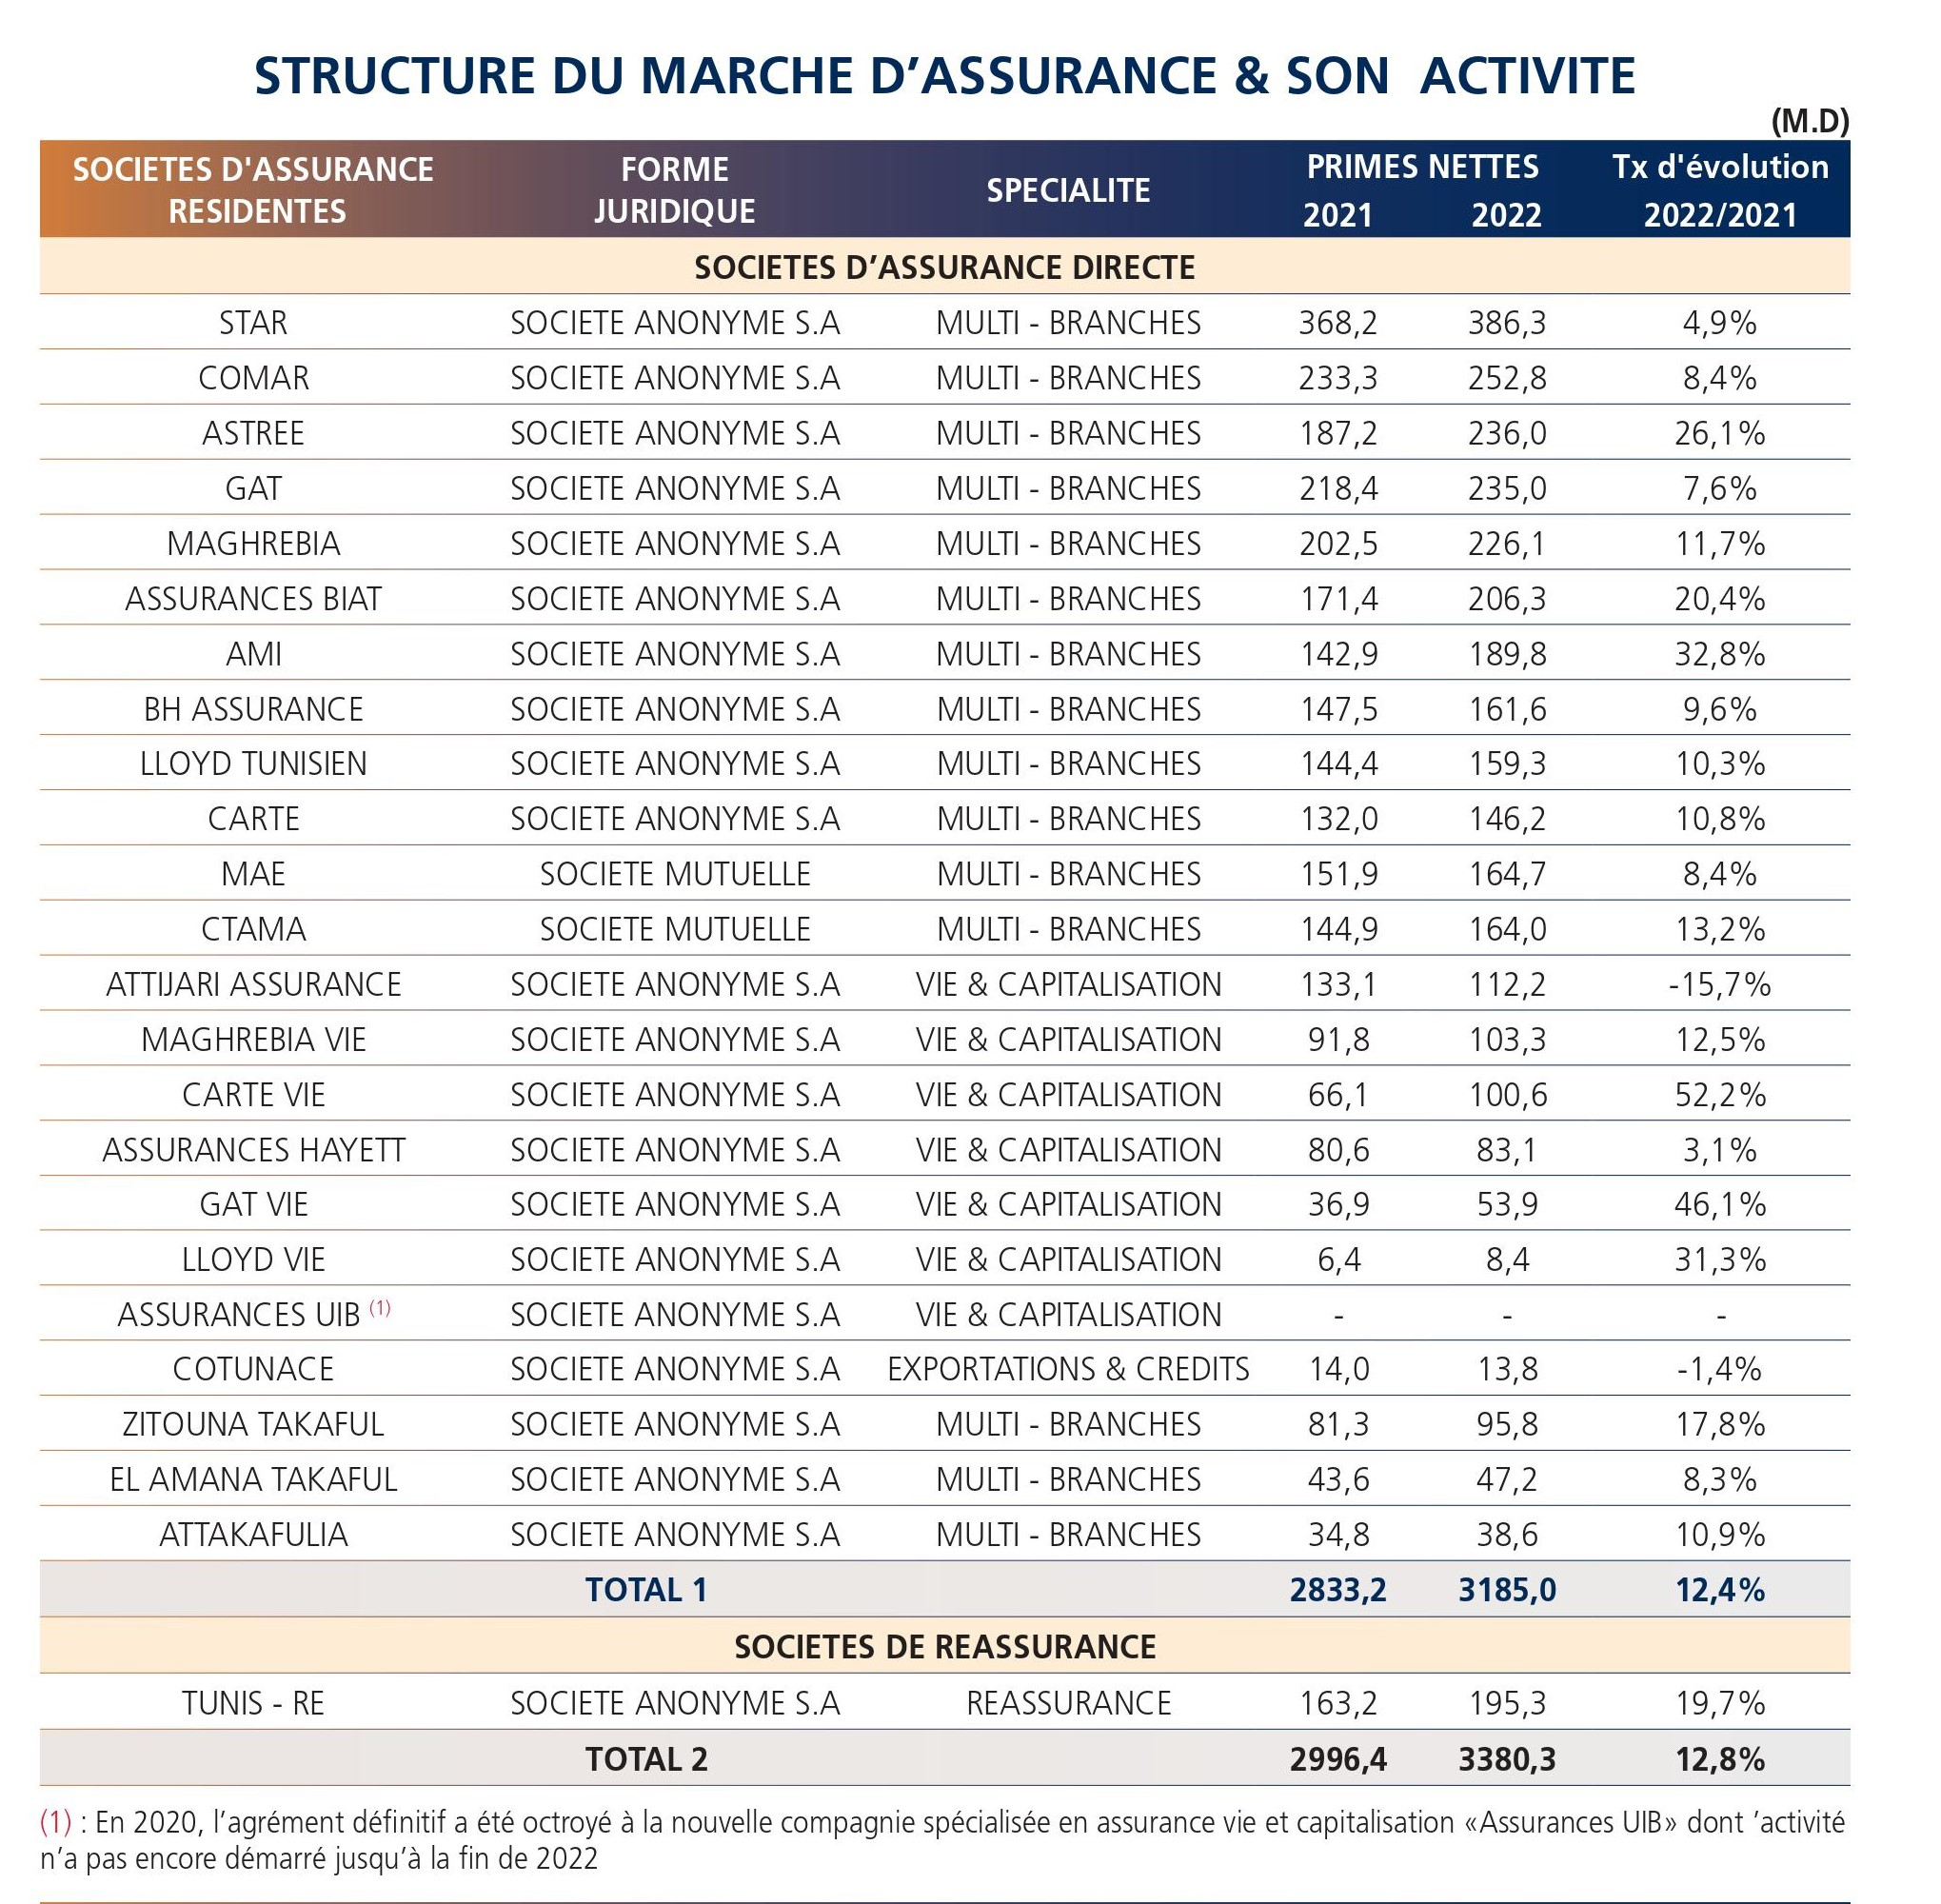

In [19]:
display_image_results("./results/markdown/other_table_big.md", "/kaggle/input/different-tables-images-testing/other_table_big.jpg")

## **Example n°4**

In [14]:
# Process a single document image
! python demo_page_hf.py --model_path ./hf_model --input_path /kaggle/input/different-tables-images-testing/NVIDIA_Report_Removed_Pages-1-16-14_page-0001.jpg --save_dir ./results

2025-06-08 12:34:45.334015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749386085.355244     196 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749386085.362299     196 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True`


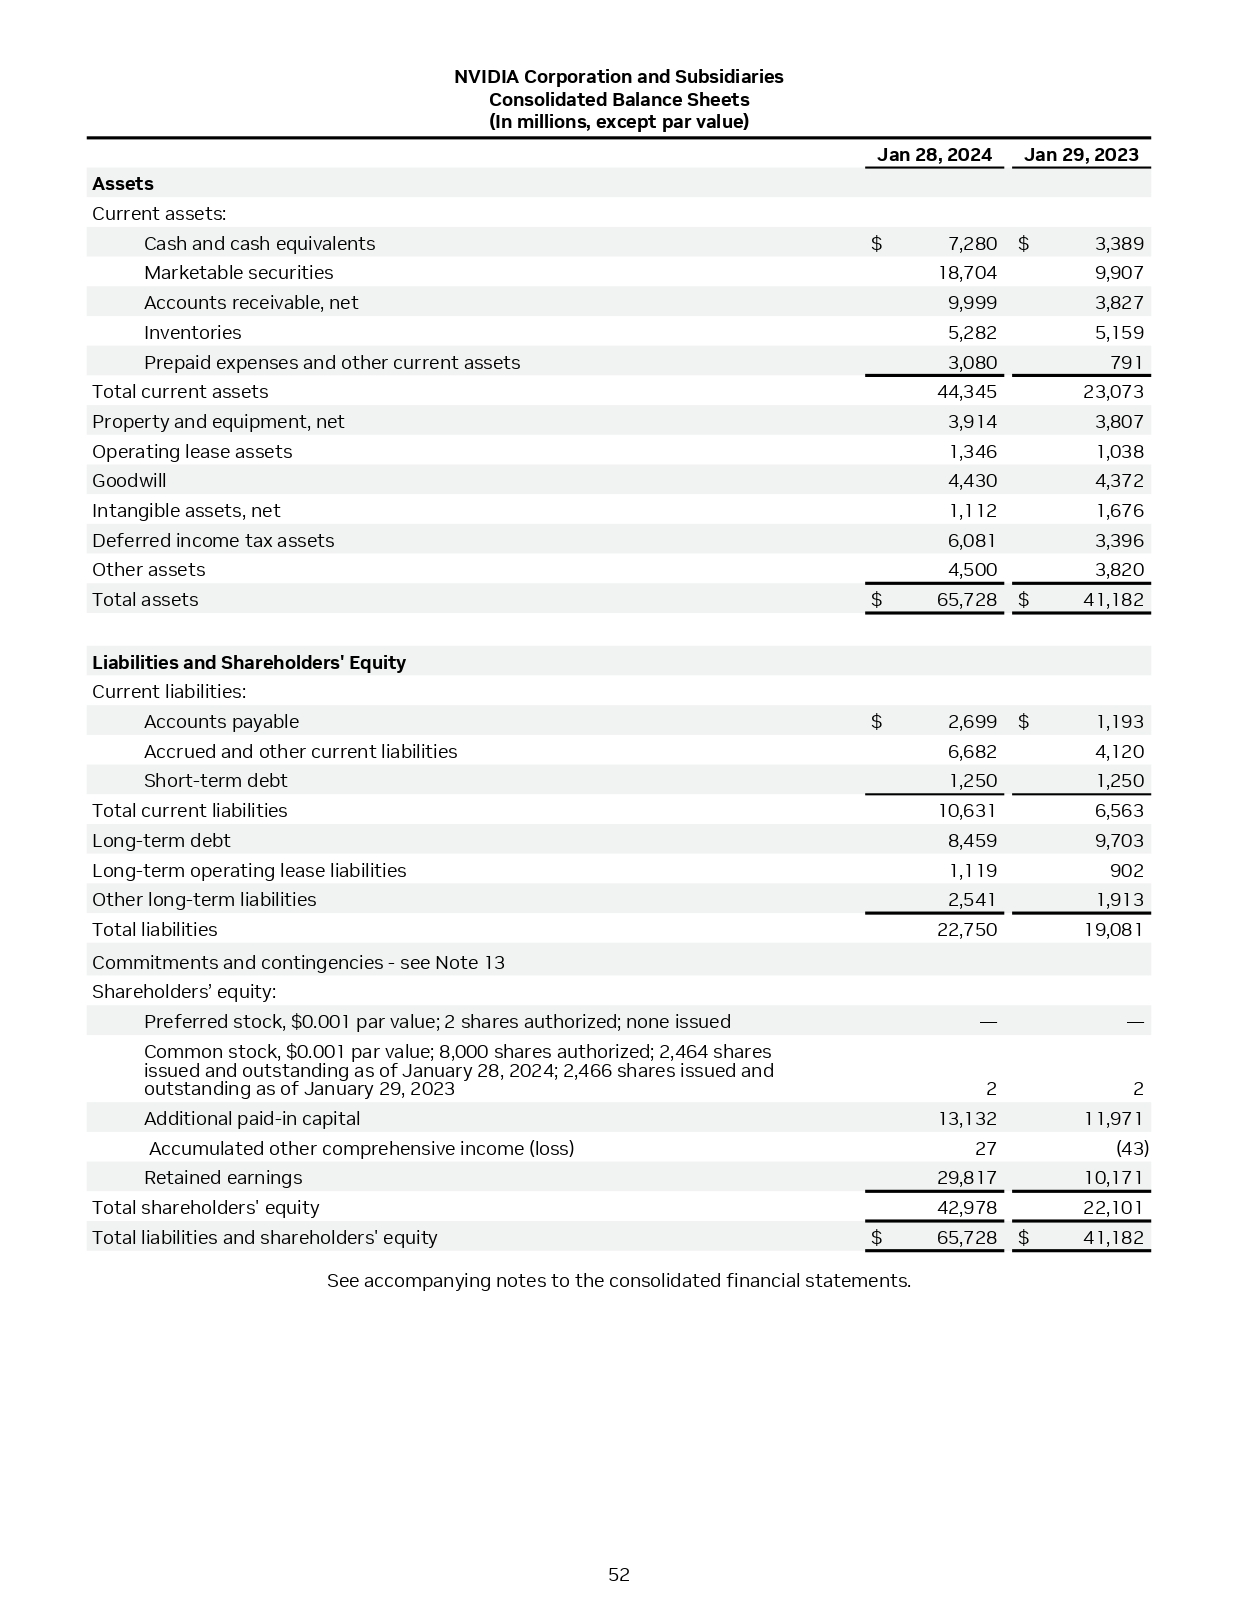

In [15]:
display_image_results("./results/markdown/NVIDIA_Report_Removed_Pages-1-16-14_page-0001.md", "/kaggle/input/different-tables-images-testing/NVIDIA_Report_Removed_Pages-1-16-14_page-0001.jpg")